In [2]:
import pymatgen as pmg
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.core.periodic_table import Element
from matplotlib.pyplot import figure

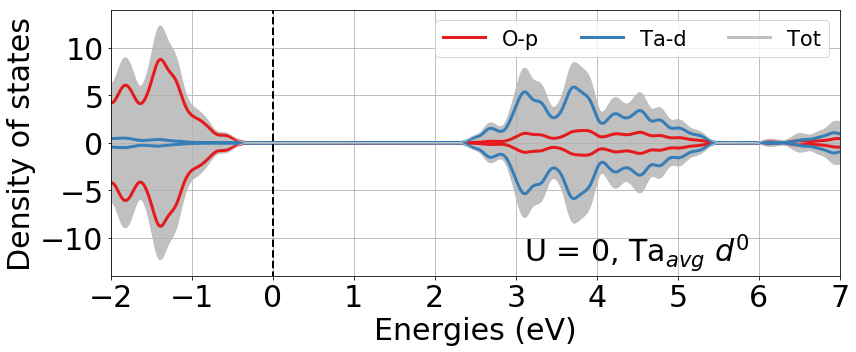

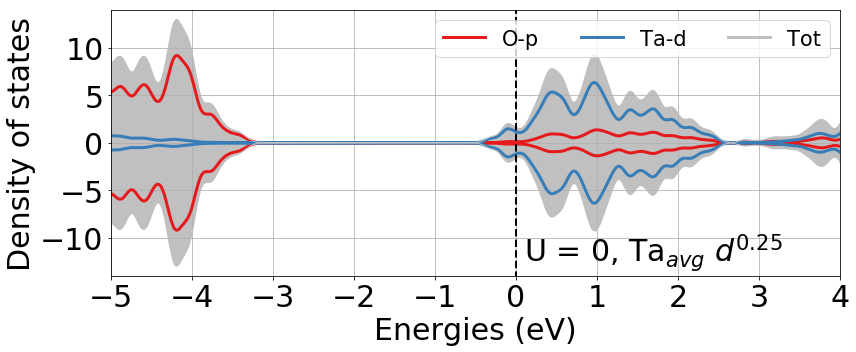

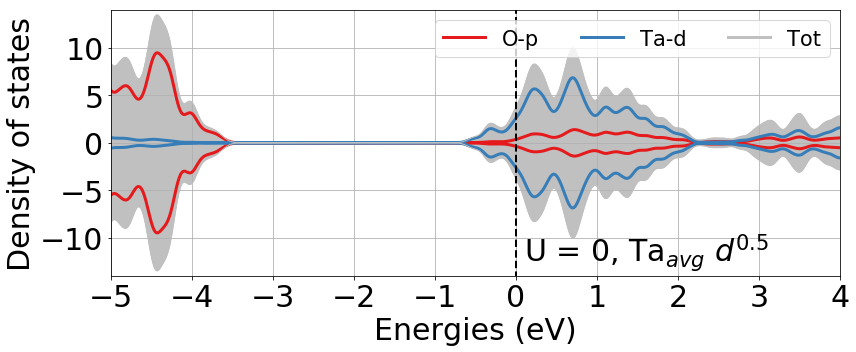

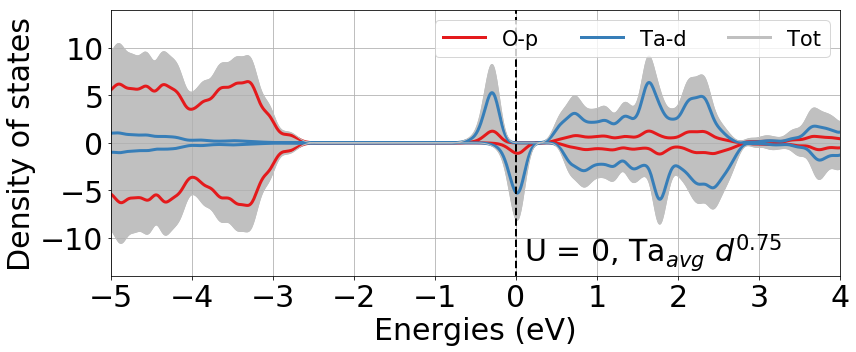

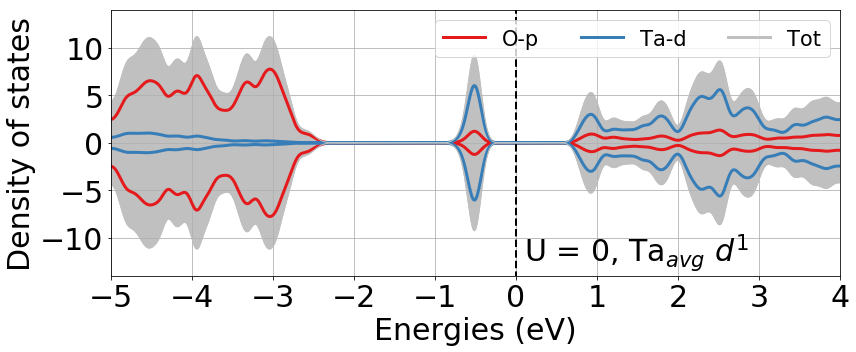

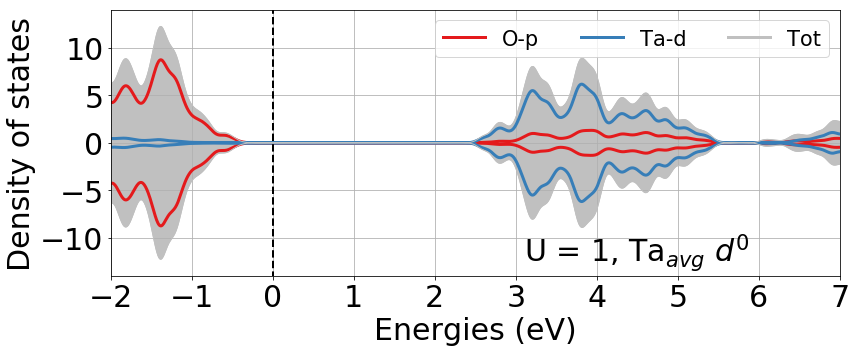

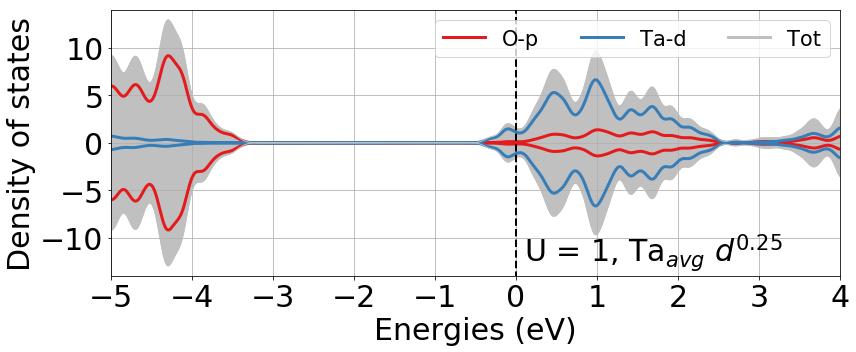

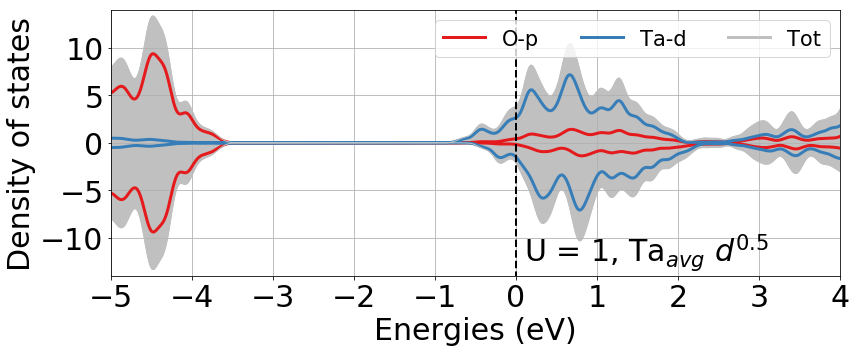

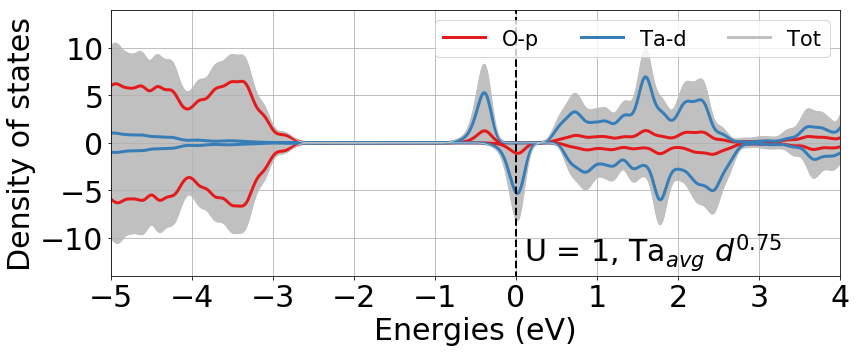

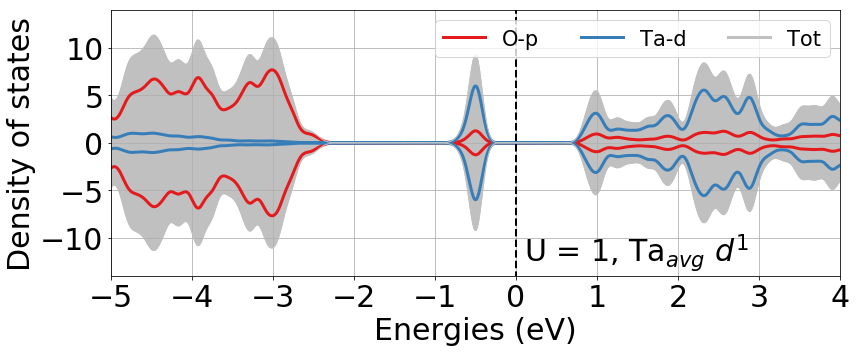

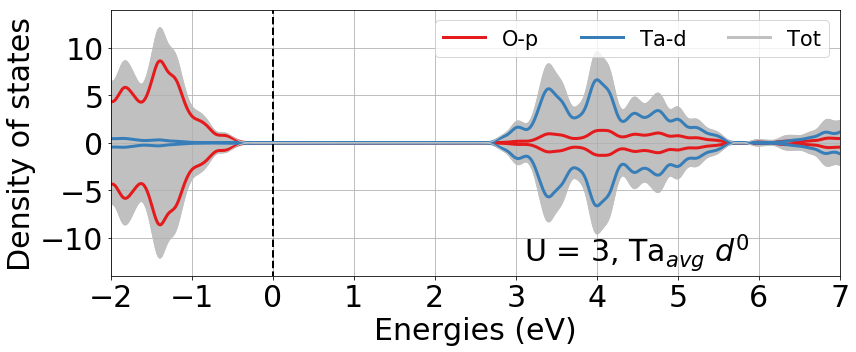

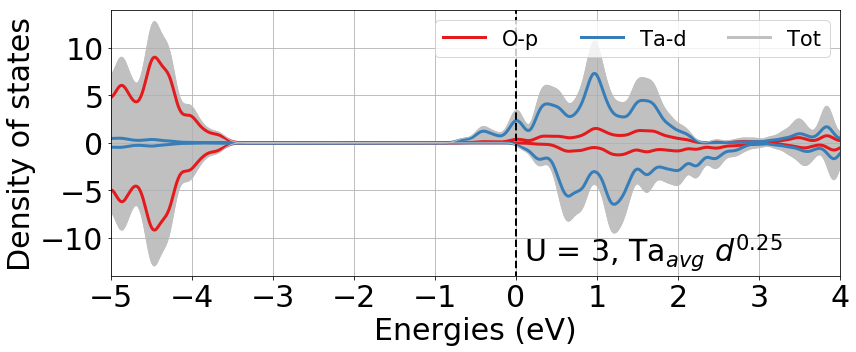

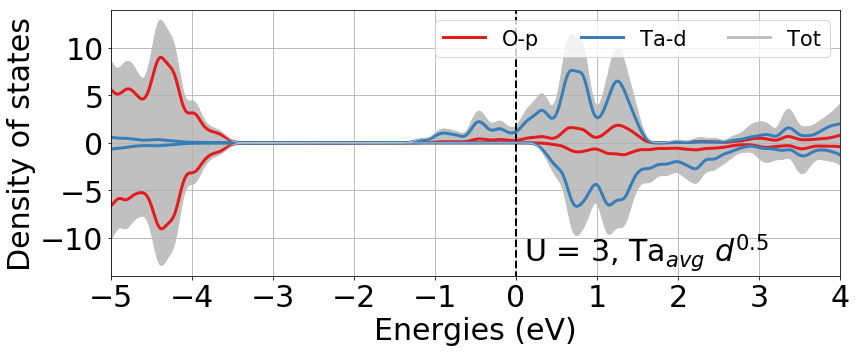

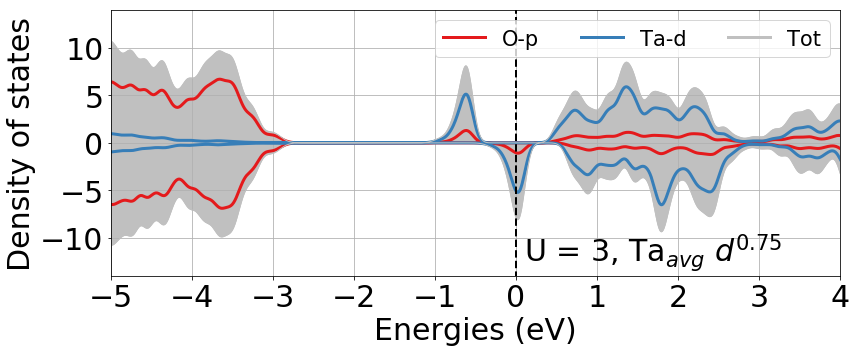

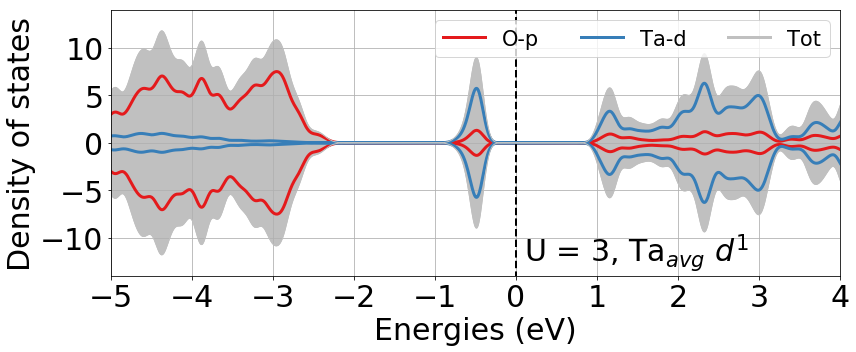

In [24]:
ELEMENTS = ["Ta", "O"]
PREFIX = "vasprun"
SUFFIX = ".xml"
ITERS_1 = ["0", "1", "3"]
ITERS_2 = ["d0", "d025", "d05", "d075", "d1"]
DOPING_LABELS = ['$d^{0}$','$d^{0.25}$','$d^{0.5}$','$d^{0.75}$','$d^{1}$']
XLIMS = [[-2,7]] + [[-5,4]]*4
LABEL_FONT = 30

for iter_1 in ITERS_1:
    for j, iter_2 in enumerate(ITERS_2):
        
        # Extract dos from vasprun
        vr = Vasprun(PREFIX +'-'+ iter_1 +'-'+ iter_2 + SUFFIX)
        cdos = vr.complete_dos
        tdos = vr.tdos
        elem_doss = cdos.get_element_dos()
        dplt = DosPlotter()

        # Add total dos
        dplt.add_dos("tot", tdos)

        # Add dos for each element
        for elem in ELEMENTS:
            dplt.add_dos(elem, elem_doss[Element(elem)])
    
        # Customize plot
        dos_plot = dplt.get_plot()
        dos_plot.xlim(XLIMS[j])
        dos_plot.ylim(-14,14)
        dos_plot.grid(1)
            
            # Make total line grey and filled in
        totLine = dos_plot.gca().get_lines()[2]
        totLine.set_color('silver')
        
        dos_plot.legend(["O-p", "Ta-d", "Tot"],loc='upper right', ncol=3, fontsize=21) #keep line thick in legend
        
        totLine.set_linewidth(1)   
        
        totX = totLine.get_xdata()
        totY = totLine.get_ydata()
        
        dos_plot.fill_between(totX, totY, where=totY>=-totY, interpolate=True, color='silver')
        dos_plot.fill_between(totX, totY, where=totY<=-totY, interpolate=True, color='silver')

        
            # Add a U, doping label to bottom right
        dos_plot.text(XLIMS[j][1]-3.9, -12.5, f"U = {iter_1}, Ta$_{{avg}}$ {DOPING_LABELS[j]}", fontsize=LABEL_FONT)

            # Chance font size
        dos_plot.gca().xaxis.label.set_fontsize(LABEL_FONT)
        dos_plot.gca().yaxis.label.set_fontsize(LABEL_FONT)
#         dos_plot.gca().get_xticklabels().set_fontsize(LABEL_FONT)
#         dos_plot.gca().get_yticklabels().set_fontsize(LABEL_FONT)

        
            # Resize/reshape
        fig = dos_plot.gcf()
        fig.set_size_inches(12,5)
        
        # Show and save
        dos_plot.tight_layout()
        dos_plot.show()
        fig.savefig(f"figures/elec_dos-U{iter_1}-{iter_2}", img_format="png")
